<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Task 3</i></font></h1>

#### In this notebook we want to become more familiar with data visualization and classify data with Logistic Regression.

# Section 1: MNIST Dataset
You can find information about the dataset and download it from [here](https://www.kaggle.com/oddrationale/mnist-in-csv)(please download train dataset).


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df_train=pd.read_csv("mnist_train.csv")

print(df_train.shape)
df_train

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualize Dataset
Define functions for each purpose:
1. plot a digit

<img src="images/digit.png" width="50" height="50">

2. plot a series of instances of each class

<img src="images/digits.png" width="300" height="300">
3. Plot a shifted digit

<img src="images/shift.png" width="300" height="70">

In [5]:
import numpy as np

X_train = df_train.drop('label',axis=1)
X_train = X_train /255

X_train1 = X_train.to_numpy()
X_train1 = np.resize(X_train,(len(X_train),28,28))

# Plot a Digit

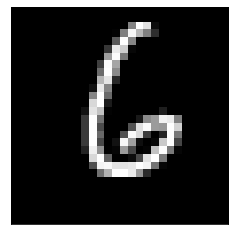

In [30]:
plt.figure()
plt.imshow(X_train1[32], cmap='gray')
plt.xticks([])
plt.yticks([])   
plt.show()

# Plot a Series

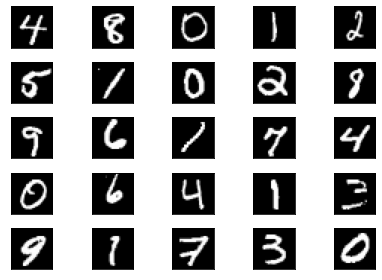

In [38]:
import random
for i in range(0,5):
    for j in range(0,5):
        index = random.randrange(0, len(X_train1))
        plot = plt.subplot2grid((5, 5), (i, j))
        plot.imshow(X_train1[index].reshape(28,28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

# Plot Shifted Digits

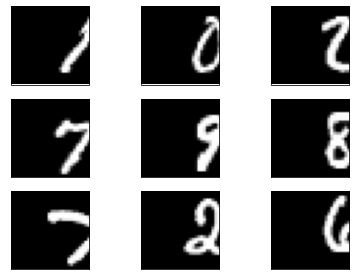

In [42]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

X_train_augmented = []
for dx, dy in ((10,0), (-10,0), (0,10), (0,-10)):
     for image in X_train1:
             X_train_augmented.append(shift_image(image, dx, dy))
            
import random
for i in range(0,3):
    for j in range(0,3):
        index = random.randrange(0, len(X_train1))
        plot = plt.subplot2grid((3, 3), (i, j))
        plot.imshow(X_train_augmented[index].reshape(28,28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

## Classification
In this part, you should do a binary classification to predict if a digit is '4' or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision and Recall.
3. Plot Recall vs Precision for different thresholds (using sklearn.metrics.precision_recall_curve) like the figures below:

<img src="images/rec_vs_pre1 .png" width="300" height="100">
<img src="images/rec_vs_pre2 .png" width="320" height="300">


In [63]:
df_train=pd.read_csv("mnist_train.csv")

In [80]:
import sklearn

y = [1 if i == 4 else 0 for i in df_train['label']]
X = df_train.drop('label', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\ssa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

other digits       0.99      0.99      0.99     16274
     digit 4       0.91      0.91      0.91      1726

    accuracy                           0.98     18000
   macro avg       0.95      0.95      0.95     18000
weighted avg       0.98      0.98      0.98     18000



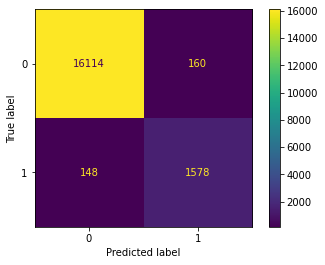

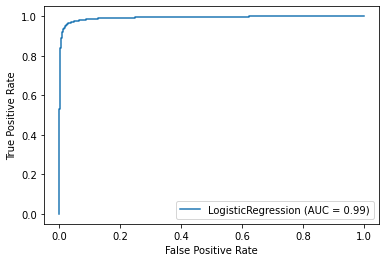

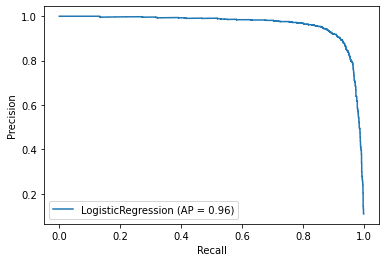

Confusion Matrix : 
 [[16114   160]
 [  148  1578]]
Accuracy :  0.9828888888888889
Sensitivity :  0.9901683667199214
Specificity :  0.9142526071842411


In [89]:
from sklearn.metrics import classification_report

target_names = ['other digits', 'digit 4']
print(classification_report(y_test, y_pred, target_names=target_names))


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test, y_test)
plt.show()


from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(logreg, X_test, y_test)
plt.show()

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

# Section 2: Titanic Dataset

You can find information about the dataset and download it from [here](https://www.kaggle.com/c/titanic/data)(please download train dataset).


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('titanic_train.csv')

print(df_train.shape)
df_train

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Cleaning Dataset
Do some process and answer to questions below:

1. Which columns have missing values?
2. How do you fill the missing values, and why do you use this approach?

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
from collections import Counter
print(Counter(df_train['Embarked']))

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


In [112]:
df = df_train.drop('Cabin', axis=1)
df['Embarked'] = df['Embarked'].fillna('S')
# df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.dropna()

display(df)
df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


## Exploratory Data Analysis

Answer to these questions by plot relating figures:

1. Compare the age distribution for survivors and the deceased. Do you see any interesting points?
2. Compare the fare distribution for survivors and the deceased. Look at the features' description on Kaggle, is there any other feature that seems to be highly correlated to fare? Explain it.
3. Plot the survivors based on the embarked port. What do you see? Do you have any hypothesis? 
4. Plot data based on traveling alone and with family (you may need to merge 2 columns of data somehow).
5. Which gender was more likely to survive? Do you know why?

# Description
<p>1) By comparing the age distribution for survivors and the deceased We can see persons with low ages (childern) had more survival rate than the old ones, old persons had more deceased rate.</p><br><br>

<p>2) By comparing the fare distribution for survivors and the deceased people who paid low fares had more deceased rate.Due to Kaggle, Pclass is highly corrolated to Fare, Since people with bigger pclass means better cabin rooms and more amenities, So these people had to pay more fare.</p><br><br>

<p>3) By comparing the survivors based on the embarked port, it is concluded that people who were on 'S' port had more survaival rate than the other ports but we know the percentage of people on S port was also bigger than the others. The total rate calculating as survival_rate/total for the 'C' Port was the most.</p><br><br>

<p>4) For this purpose we combined 2 columns (Parch and SibSp) which can indicate family relation. Then we plotted it</p><br><br>

<p>5) As it can be seen wemon survived more, Since in the titanic accident childern and wemon had more priroty to get on the safe boats.</p><br><br>

In [130]:
import seaborn as sns

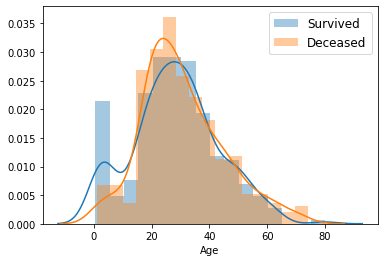

In [139]:
_ = sns.distplot(df_train[df_train['Survived']==1]['Age'],  kde=True, label='Survived')
_ = sns.distplot(df_train[df_train['Survived']==0]['Age'],  kde=True, label='Deceased')
plt.legend(prop={'size': 12})
plt.show()

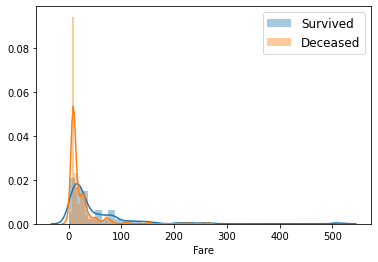

In [140]:
_ = sns.distplot(df_train[df_train['Survived']==1]['Fare'],  kde=True, label='Survived')
_ = sns.distplot(df_train[df_train['Survived']==0]['Fare'],  kde=True, label='Deceased')
plt.legend(prop={'size': 12})
plt.show()

C:\Users\ssa\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ssa\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


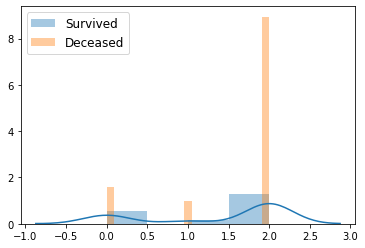

In [194]:
survival_Embarked = pd.DataFrame(df['Embarked'])

from sklearn import preprocessing
survival_Embarked = preprocessing.LabelEncoder().fit_transform(survival_Embarked)

_ = sns.distplot(survival_Embarked[df['Survived']==1],  kde=True, label='Survived')
_ = sns.distplot(survival_Embarked[df['Survived']==0],  kde=True, label='Deceased')
plt.legend(prop={'size': 12})
plt.show()

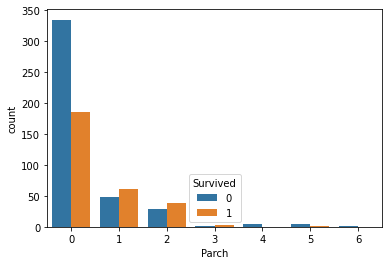

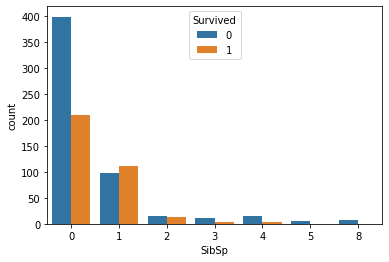

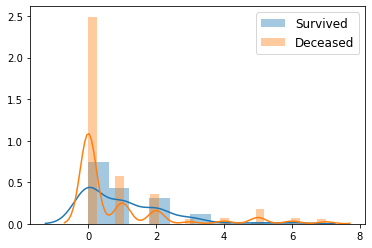

In [162]:
ax = sns.countplot(df['Parch'],hue=df['Survived'])
plt.show()


ax = sns.countplot(df_train['SibSp'],hue=df_train['Survived'])
plt.show()

family=df['SibSp']+df['Parch']
_ = sns.distplot(family[df['Survived']==1],  kde=True, label='Survived')
_ = sns.distplot(family[df['Survived']==0],  kde=True, label='Deceased')
plt.legend(prop={'size': 12})
plt.show()

C:\Users\ssa\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


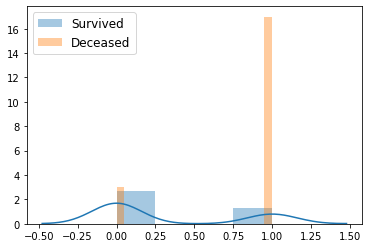

In [158]:
Sex = pd.DataFrame(df['Sex'])

from sklearn import preprocessing
Sex = preprocessing.LabelEncoder().fit_transform(np.array(Sex).ravel())

_ = sns.distplot(Sex[df['Survived']==1],  kde=True, label='Survived')
_ = sns.distplot(Sex[df['Survived']==0],  kde=True, label='Deceased')
plt.legend(prop={'size': 12})
plt.show()


## Classification
n this part, you should do a binary classification to predict if a passenger survives or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision, and Recall.
-------------------------------------------------------------------------------------------------------------------------------
* Like the explanation notebook, do the necessary preprocess transformation on the dataset and report what you have done.  You get a bonus mark if you use dimension reduction techniques.

# Processing:
<p>Before we could classify the survival with logistic regression we had to do some preprocessing first.</p><br>
<p>1) First of all we droped columns PassengerId since it was uniqe for each person, Name since it was uniqe for each person, Ticket since it was almost uniqe for each person, Cabin Since almost 70% of it is missing.</p><br>

<p>2) Then we filled Age nan with its median since many of the people in the titanic had almost the same age. And Since in Embarked port there were only 3 missing value we filled it with the most used emparked port 'S'.</p><br>

<p>3) We had to labelize the Sex and Embarked column since they have to be regressions, So we maped them to 0 1 2 for each type and replaced them.</p><br>

<p>4) We added the family column since it could give us a new kind of information that seems to have impact on our accuracy as we discussed in the previos part.</p><br>

<p>5) We used PCA techniqe to lower the features, Since we did not have much data to predict the survival we needed to decrease the features to reach a better accuracy. Here we did PCA dimentional reduction techniqe for both testing and training data.</p><br>

<p>6) Finally we fit the logistic regression on the train data and predict the test data, And we calculated some metrics to evaluate our model on this dataset. <b>We reached an accuracy of 70% with the above techniqes</b>. Accuracy could be better by doing grid serach for logistic regression or other dimentional reduction teqniqe.</p><br>

In [163]:
df_train = pd.read_csv('titanic_train.csv')
display(df_train)
df_train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
df = df_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

df['Embarked'] = df['Embarked'].map({'C':0,'Q':1,'S':2})
df['Sex'] = pd.get_dummies(df['Sex'])

df['Family'] = df['SibSp'] + df['Parch']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Family    891 non-null    int64  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 56.7 KB


In [177]:
display(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,2,1
1,1,1,1,38.0,1,0,71.2833,0,1
2,1,3,1,26.0,0,0,7.9250,2,0
3,1,1,1,35.0,1,0,53.1000,2,1
4,0,3,0,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2,0
887,1,1,1,19.0,0,0,30.0000,2,0
888,0,3,1,28.0,1,2,23.4500,2,3
889,1,1,0,26.0,0,0,30.0000,0,0


In [187]:
import sklearn

y = df.Survived
X = df.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
from sklearn.decomposition import PCA
X_train = PCA(n_components=4).fit_transform(x_train)
X_test = PCA(n_components=4).fit_transform(x_test)

display(pd.DataFrame(X_train))
display(pd.DataFrame(X_test))

,0,1,2,3
0,49.370304,-26.266670,-0.693466,-0.676911
1,-23.978461,-0.347247,-0.954894,-0.527323
2,-21.418307,-27.502362,0.198525,-0.418016
3,-3.885952,6.991284,2.644520,-0.344515
4,-5.214494,14.068079,1.910928,-0.295455
...,...,...,...,...
618,-24.403664,-7.334144,-1.246321,-0.460271
619,-0.866714,-0.903557,-1.272414,-0.332423
620,-17.411089,12.352964,2.240890,-0.235450
621,87.767100,-17.322375,0.780017,-0.590844


,0,1,2,3
0,-17.846213,-1.705973,1.529830,1.683264
1,-22.521106,1.529440,-0.716774,-0.463478
2,-25.439331,-9.398816,-1.022634,-0.342081
3,-0.778431,-24.162881,-0.503722,-0.413567
4,-22.281344,-15.530397,-0.101769,1.694276
...,...,...,...,...
263,-24.490096,-2.430038,-0.779480,-0.355476
264,-33.094567,-1.129175,-0.792240,-0.493582
265,-5.438645,35.021000,0.287999,-0.690343
266,-24.793191,-12.417287,-1.136378,-0.342199


In [192]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

              precision    recall  f1-score   support

other digits       0.64      0.91      0.75       157
     digit 4       0.70      0.29      0.41       111

    accuracy                           0.65       268
   macro avg       0.67      0.60      0.58       268
weighted avg       0.67      0.65      0.61       268



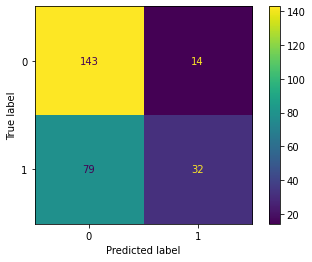

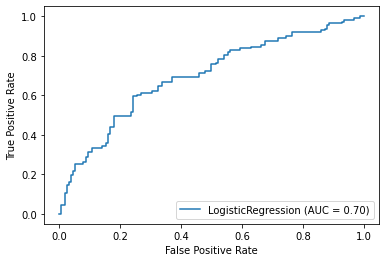

Confusion Matrix : 
 [[143  14]
 [ 79  32]]
Accuracy :  0.6529850746268657
Sensitivity :  0.910828025477707
Specificity :  0.2882882882882883


In [193]:
from sklearn.metrics import classification_report

target_names = ['other digits', 'digit 4']
print(classification_report(y_test, y_pred, target_names=target_names))


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test, y_test)
plt.show()

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)